In [40]:
from keras.datasets import cifar10
import numpy as np

# 케라스(Keras)는 파이썬으로 작성된 오픈 소스 신경망 라이브러리

# RGV 32*32 픽셀 이미지를 10개의 카테고리로 분류

# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭

In [41]:
(X_train, y_train0),(X_test,y_test0) = cifar10.load_data()

In [42]:
print(X_train.shape,X_train.dtype)
print(y_train0.shape,y_train0.dtype)
print(X_test.shape,X_test.dtype)
print(y_test0.shape,y_test0.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


In [43]:
import matplotlib.pyplot as plt

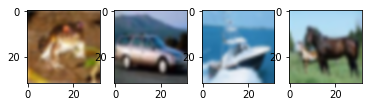

In [44]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")

plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")

plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")

plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

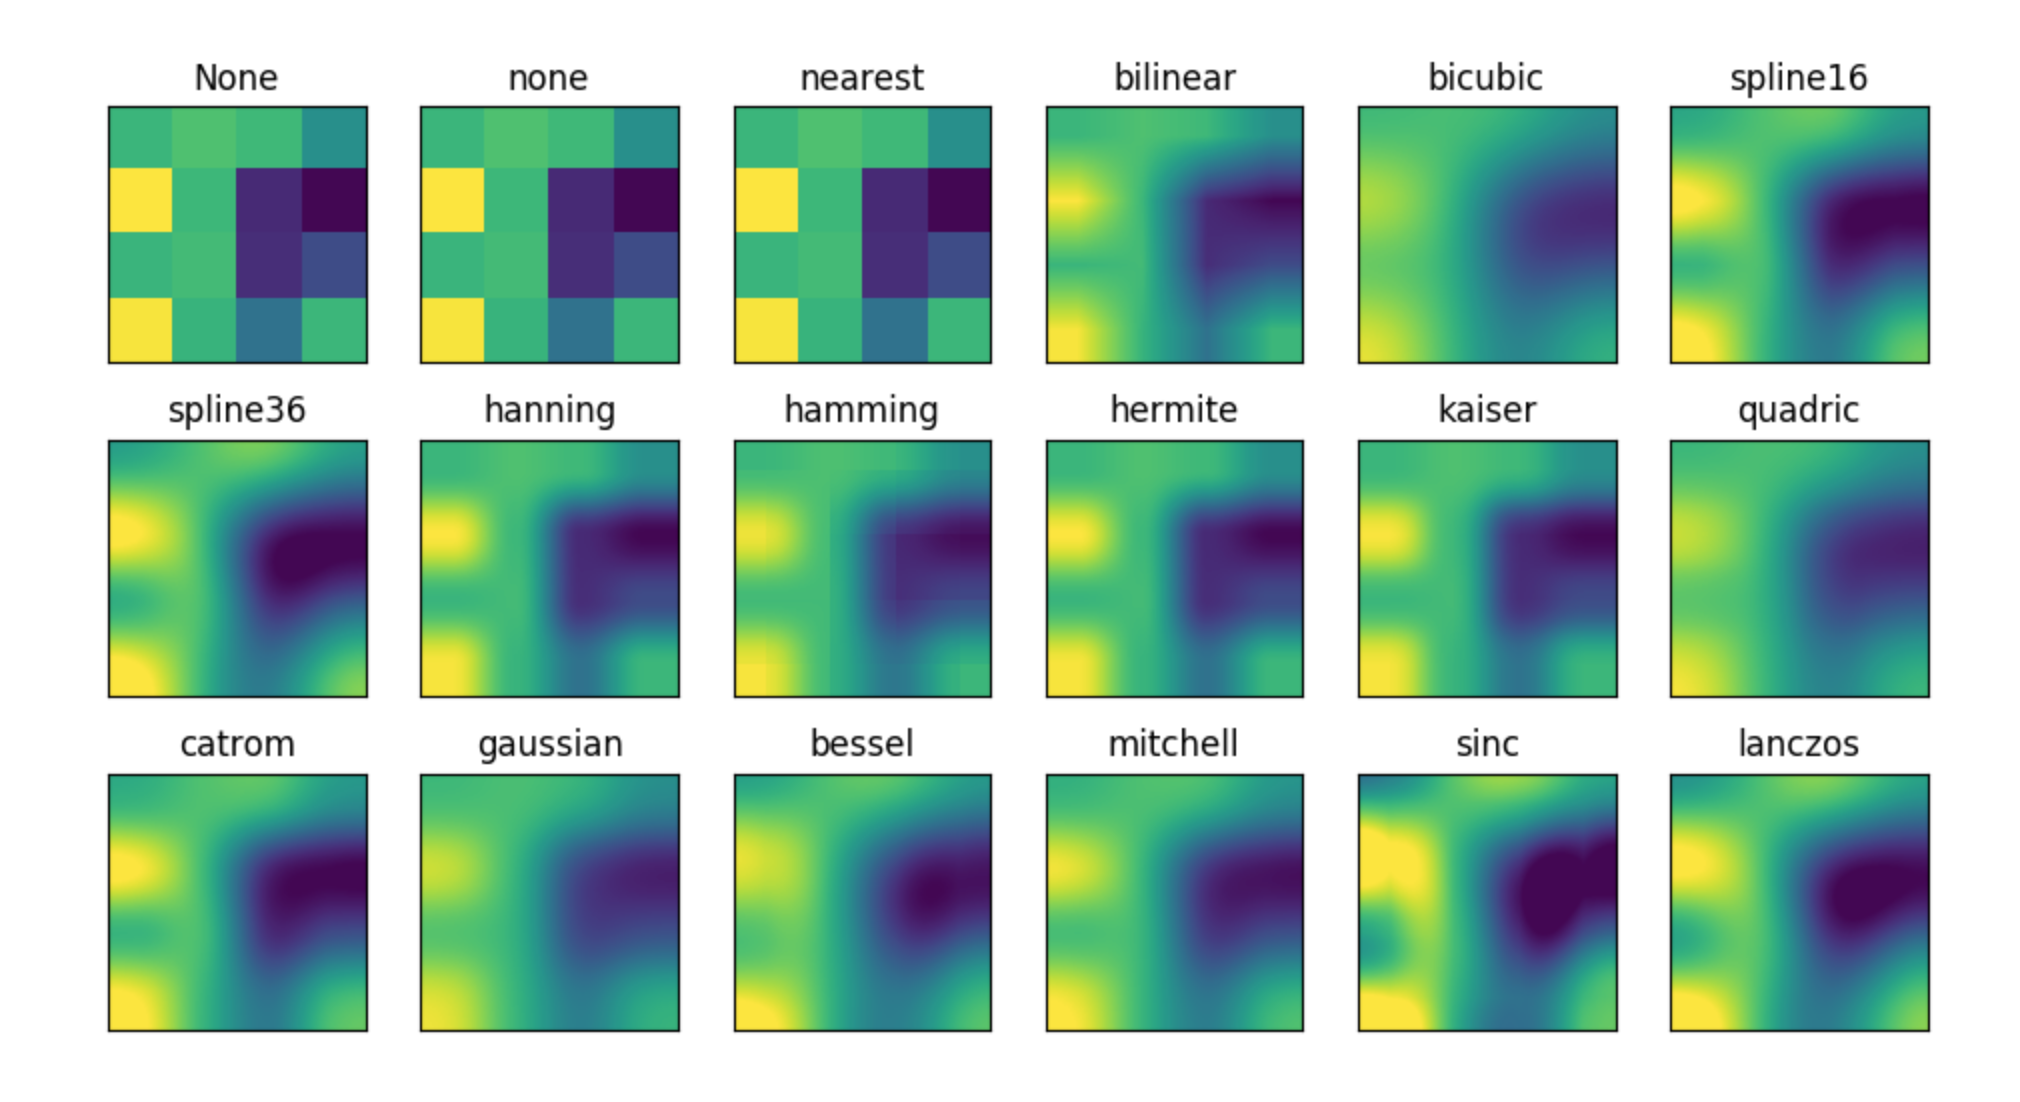

In [45]:
# interpolation : 보간법
# 알고있는 데이터 값들을 이용하여 모르는 값을 추정하는 방법
from IPython.display import Image
Image("img/interpolation.png", height=400, width=600)

In [46]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
print(X_train.shape,X_train.dtype)

(50000, 32, 32, 3) float32


In [47]:
from keras.utils import np_utils

In [48]:
Y_train = np_utils.to_categorical(y_train0, 10)# 10개 중의 하나로 추출
Y_test = np_utils.to_categorical(y_test0,10)
Y_train[:4] # one hot key

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Flatten, Dense, Dropout
from keras.regularizers import l2

In [50]:
np.random.seed(7)

model = Sequential()
model.add(Conv2D(64,(5,5), activation='relu', input_shape=(32,32,3), 
                 padding="same", kernel_regularizer=l2(0.001)))
model.add(Conv2D(64,(5,5), activation='relu', padding="same"))
model.add(MaxPool2D())
model.add(Dropout(0.1))

In [51]:
# Dropout: 과적합 방지를 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런을 제외시킵니다.

model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(MaxPool2D())
model.add(Dropout(0.2))

In [52]:
model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(MaxPool2D())
model.add(Dropout(0.3))

In [53]:
model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(Conv2D(64,(5,5), activation='relu', padding="same", kernel_regularizer=l2(0.01)))
model.add(MaxPool2D())
model.add(Dropout(0.4))

In [54]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 입력 뉴련과 출력 뉴런을 모두 연결한다고 해서 전경합층
# 케라스에서 Dense라는 클래스로 구현
# Dense (9, init='uniform', activation='relu')
# 9: 출력 뉴런의 수를 설정

# actiration : 활성화 함수
# linear : 디폴트값 : 입력 뉴런과 가중치로 계산된 결과값이 그대로 출력
# relu : rectifier 함수 : 은닉층
# sigmoid : 이진 분류 문제에서 출력층
# softmax : 다중 분류 문제에서 출력층

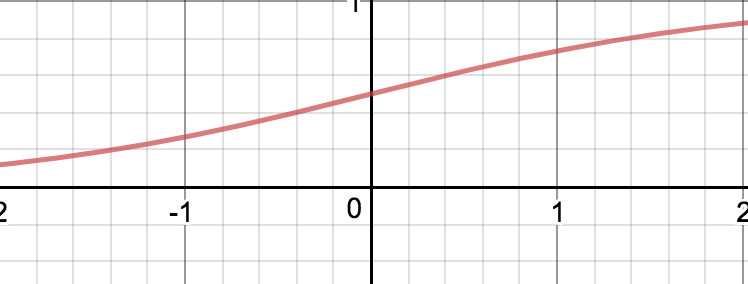

In [55]:
Image("img/sigmoid.png", height=400, width=600)

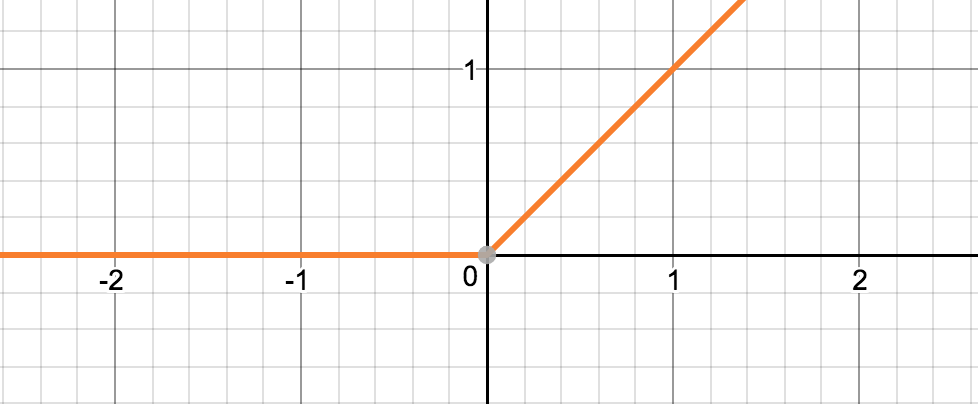

In [56]:
Image("img/relu.png", height=400, width=600)

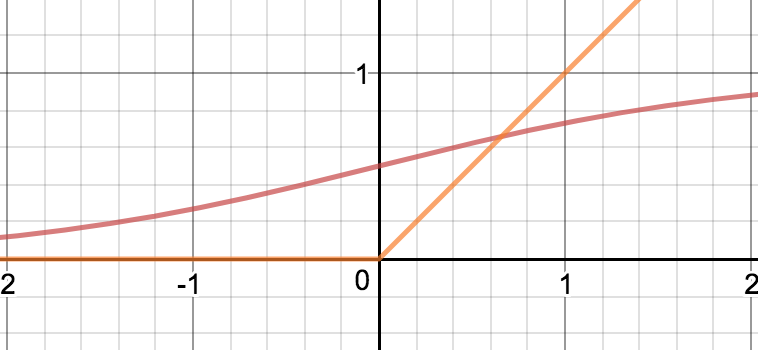

In [57]:
Image("img/sigmoid_relu.png", height=400, width=600)

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [61]:
hist=model.fit(X_train, Y_train, epochs=50,
              batch_size=50,
              validation_data = (X_test,Y_test),
              verbose=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
